In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist.data[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import numpy as np

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)
print(X.shape, y.shape)

(70000, 784) (70000,)


/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_2132/1275198956.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


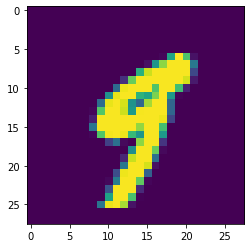

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.values[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [4]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

9

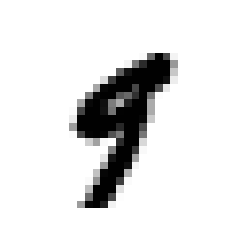

In [10]:
plot_digit(X.values[36000])
y.values[36000]

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# 인덱스 섞음

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train.values[shuffle_index],y_train.values[shuffle_index]

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
# 확률적 경사하강법
# 데이터를 랜덤으로 하나 추출하여 기울기(실제값과 예측값의 오차)를 계산
# 빠르게 최소 오차의 최적점을 찾음

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([False])

In [16]:
# 교차검증

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9647, 0.9644, 0.9615])

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 클래스 비율을 일정하게 유지
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9647


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9644
0.9615


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [19]:
# 모든 예측결과를 False로 리턴하는 테스트용 클래스

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
print(never_5_clf.predict(X_train))
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([0.9102 , 0.9122 , 0.90655])

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = sgd_clf.predict(X_train)
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

[[54079   500]
 [ 1360  4061]]
54079 500 1360 4061


In [21]:
from sklearn.metrics import precision_score, recall_score

# 정밀도 : TP/(TP+FP). 모형이 1로 분류한 것 중 실제로 1인 것의 비율
print(precision_score(y_train_5,y_train_pred))
print(tp/(tp+fp))

# 민감도(=재현율). 1을 1로 맞춘 비율
print(recall_score(y_train_5, y_train_pred))
print(tp/(tp+fn))

0.8903749177811884
0.8903749177811884
0.7491237779007563
0.7491237779007563


In [22]:
# 정밀도와 재현율의 조화 평균

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)
# 정밀도와 재현율은 반비례하는 관계

0.813664596273292

In [23]:
# sgd 모형의 판별 함수

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-319736.52183826])

In [ ]:
# 9페이지
# 다중분류

In [31]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([3])

In [30]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
print(sgd_clf.classes_[3])

[[-525742.1786264  -386127.92154166 -731823.01914732 -116852.75064236
  -127197.2348687  -368925.86641904 -816241.68575839 -353537.5221717
  -389007.58297046 -180200.16100237]]
3
[0 1 2 3 4 5 6 7 8 9]
3


In [26]:
# 일대다 전략
# 0만 찾는 모형, 1만 찾는 모형 등으로 실행됨

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SGDClassifier(max_iter=5, random_state=10))
ovr_clf.fit(X_train, y_train)
len(ovr_clf.estimators_) # 분류기 개수
pred = ovr_clf.predict(X_test)
np.mean(pred == y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before

0.864

In [27]:
# 다중 레이블 분류

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [28]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [ ]:
# 데이터 증식

In [32]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784')

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_2132/2733138966.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [33]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.values[shuffle_index], y_train[shuffle_index]

In [34]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image,[dy,dx])
    return shifted_image.reshape([-1])

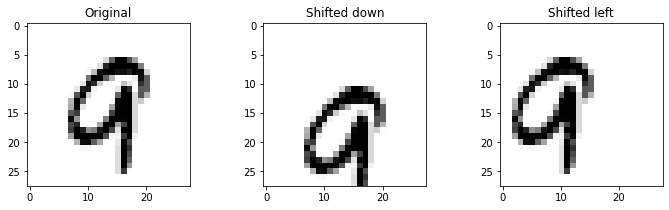

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

image = X_train[70]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28,28),cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28,28),cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28,28),cmap="Greys")
plt.show()

In [36]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [37]:
import numpy as np

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_augmented[:1000],y_train_augmented[:1000])

KNeighborsClassifier(n_neighbors=1)

In [39]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test[:1000])
accuracy_score(y_test[:1000],y_pred[:1000])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.801